In [1]:
%load_ext autoreload
%autoreload 2
import deepinv as dinv
import einx
import torch
from torch.utils.data import DataLoader

/bmrc-an-data/Chunxu/tis_fastmri/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dinv.datasets.download_archive(
    dinv.utils.get_image_url("demo_fastmri_brain_multicoil.h5"),
    dinv.utils.get_data_home() / "brain" / "fastmri.h5",
)

dataset = dinv.datasets.FastMRISliceDataset(
    dinv.utils.get_data_home() / "brain", slice_index="middle"
)

100%|██████████| 56.0M/56.0M [00:01<00:00, 30.8MB/s]
100%|██████████| 1/1 [00:00<00:00, 656.69it/s]


In [3]:
x, y = next(iter(DataLoader(dataset)))
y = einx.rearrange(
    "B C Coil ReadOut Phase_Encoding -> B Coil ReadOut Phase_Encoding C", y
).contiguous()
y = torch.view_as_complex(y)
img_size, kspace_shape = x.shape[-2:], y.shape[-2:]
n_coils = y.shape[2]

print(
    "Shapes:", x.shape, y.shape
)  # x (B, 1, H, W); y (B, C, Coil, ReadOut, Phase_Encoding)

Shapes: torch.Size([1, 1, 213, 213]) torch.Size([1, 4, 512, 213])


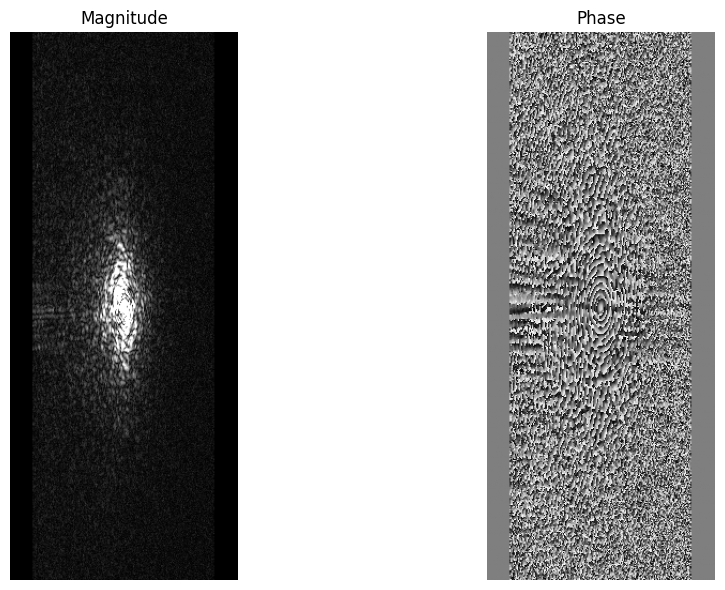

In [4]:
import matplotlib.pyplot as plt

# Plot the magnitude of the first slice
plt.figure(figsize=(12, 6))

# Magnitude plot
plt.subplot(1, 2, 1)
plt.imshow(y[0, 0].abs(), cmap="gray", vmin=0, vmax=0.0001)
plt.title("Magnitude")
plt.axis("off")

# Phase plot
plt.subplot(1, 2, 2)
plt.imshow(y[0, 0].angle(), cmap="gray")
plt.title("Phase")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from tis_fastmri.operators import AdjointModel

adj = AdjointModel()
x_adjoint = adj(
    y,
    torch.ones_like(y),
)

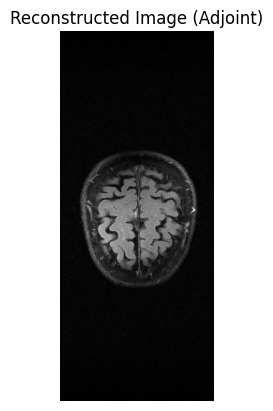

In [10]:
# plot x_adjoint
plt.imshow(torch.abs(x_adjoint[0]).cpu().detach().numpy(), cmap="gray")
plt.title("Reconstructed Image (Adjoint)")
plt.axis("off")
plt.show()
